# Mining Melon's Twitter Feed

### Set-up and loading data

In [1]:
import pandas as pd
import csv
import os
import numpy as np

In [2]:
# step up directory to find data
#owd=os.getcwd()
os.chdir("..") # to move up directory
os.chdir("..") # to move up directory
path = os.getcwd()+"/data/boogie2988.csv"
data = pd.read_csv(path)

/Users/steven/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date
0,1.198118e+18,1.198117e+18,1.574490e+12,2019-11-23,16:55:47,AUS Eastern Daylight Time,42345999,boogie2988,Boogie Travels On Youtube!,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '42345999', 'username': 'Boogie29...",NaN
1,1.198118e+18,1.198117e+18,1.574490e+12,2019-11-23,16:55:15,AUS Eastern Daylight Time,42345999,boogie2988,Boogie Travels On Youtube!,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '42345999', 'username': 'Boogie29...",NaN
2,1.198117e+18,1.198117e+18,1.574490e+12,2019-11-23,16:53:01,AUS Eastern Daylight Time,42345999,boogie2988,Boogie Travels On Youtube!,NaN,...,https://twitter.com/acape51/status/11981166186...,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '42345999', 'username': 'Boogie29...",NaN
3,1.198114e+18,1.198114e+18,1.574490e+12,2019-11-23,16:41:44,AUS Eastern Daylight Time,42345999,boogie2988,Boogie Travels On Youtube!,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '42345999', 'username': 'Boogie29...",NaN
4,1.198094e+18,1.198094e+18,1.574480e+12,2019-11-23,15:20:45,AUS Eastern Daylight Time,42345999,boogie2988,Boogie Travels On Youtube!,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '42345999', 'username': 'Boogie29...",NaN


In [4]:
print(data.dtypes)

id                 float64
conversation_id    float64
created_at         float64
date                object
time                object
timezone            object
user_id              int64
username            object
name                object
place              float64
tweet               object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
dtype: object


### Natural Language Processing

In [5]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['retweet_date'] = pd.to_datetime(data['retweet_date'], format='%Y%m%d')

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/steven/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/steven/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# initial set up and word tokenisation
frame = data['tweet'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(frame)
word_dist = nltk.FreqDist(words)
print(word_dist)

<FreqDist with 53205 samples and 1426313 outcomes>


In [9]:
# text cleaning using nltk pre-made english stopword list
# convert this to a list before computation for speed
stopwords = set(nltk.corpus.stopwords.words('english'))

In [10]:
dict_filter = lambda word_dist, stopwords: \
    dict((word,word_dist[word]) 
    for word in word_dist if word not in stopwords 
         and word.isalpha()
         and word not in ['http', 'https'])
    
filtered_word_freq = dict_filter(word_dist, stopwords)

In [11]:
# convert to pandas dataframe
rslt = pd.DataFrame(list(filtered_word_freq.items()),
                    columns=['word', 'freq'])
rslt.head()

,word,freq
0,keep,1112
1,making,661
2,youtube,4134
3,cut,127
4,spending,89


In [12]:
sorted_rslt = rslt.sort_values(by='freq', ascending=False)
sorted_rslt = sorted_rslt[:20]

### Visualising the data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

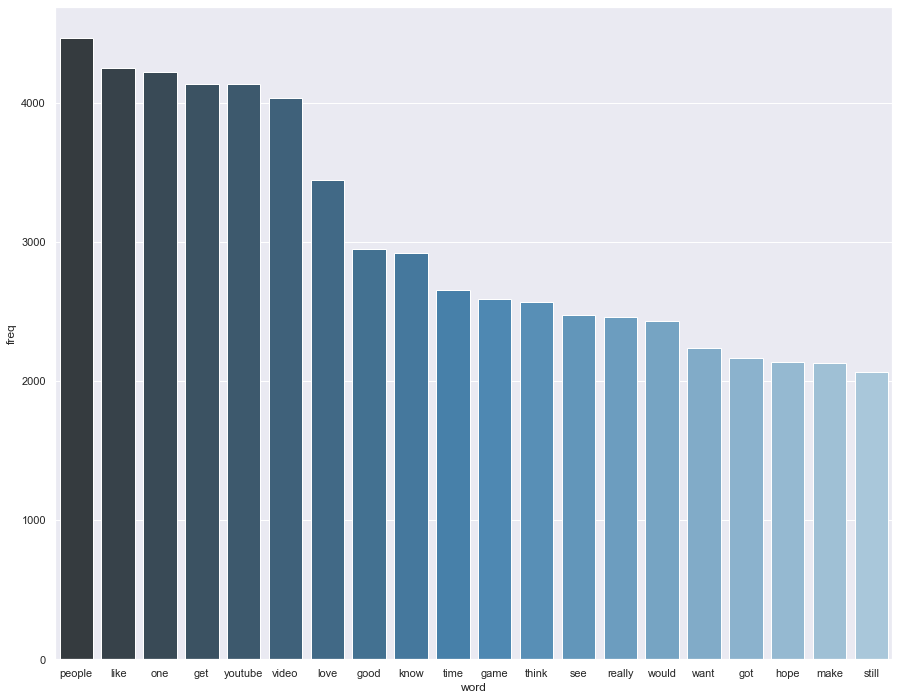

In [14]:
# most commonly used words
sorted_rslt.reset_index(level=0, inplace=True)
plt.rcParams["figure.figsize"] = (15, 12)

bar = sns.barplot(x = sorted_rslt['word'], 
                  y = sorted_rslt['freq'], 
                  data = sorted_rslt, 
                  palette = 'Blues_d')

plt.show()

In [17]:
# save to file
fig = bar.get_figure()
fig.savefig("img/output.png")